In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import numpy as np
import pandas as pd
import pickle
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,BatchNormalization
from keras.layers import Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10

# cifar10=tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
#定义标签字典，每一个数字所代表的图像类别的名称
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",
            4:"deer",5:"dog",6:"frog",
            7:"horse",8:"ship",9:"truck"}
#实现数据的标准化
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0
#建立Sequential线性堆叠模型
model=tf.keras.models.Sequential()
#第1个卷积层，有32个通道，卷积核为3*3，输入形状为32*32*3，激活函数为relu，same为边缘填充
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation='relu',padding='same'))

#防止过拟合,每次有30%的神经元不参与优化过程
model.add(tf.keras.layers.Dropout(rate=0.3))

#第1个池化层
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

#第2个卷积层，有64个通道，卷积核为3*3，输入形状为32*32*3，激活函数为relu，same为边缘填充
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))

#防止过拟合,每次有30%的神经元不参与优化过程
model.add(tf.keras.layers.Dropout(rate=0.3))

#第2个池化层
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

#第3个卷积层
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same'))

#防止过拟合
model.add(tf.keras.layers.Dropout(rate=0.3))

#第3个池化层
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

#平坦层
model.add(tf.keras.layers.Flatten())

#添加全连接层
model.add(tf.keras.layers.Dense(units=128,activation='relu'))

#添加输出层
model.add(tf.keras.layers.Dense(10,activation='softmax'))

#设置训练参数
#训练轮数
train_epochs=60
#单次训练样本数（批次大小）
batch_size=100


#定义训练模式
model.compile(optimizer='adam',#优化器
              loss='sparse_categorical_crossentropy',#损失函数（sparse的分类交叉熵）
              metrics=['accuracy'])#评估模型的方式（准确率）




#开始训练，用20%做验证集
train_history=model.fit(x_train,y_train,validation_split=0.2,epochs=train_epochs,batch_size=batch_size,verbose=2)
#定义可视化函数
def visu_train_history(train_history,train_metric,validation_metric):
    plt.plot(train_history.history[train_metric])
    plt.plot(train_history.history[validation_metric])
    plt.title('Train History')
    plt.ylabel(train_metric)
    plt.xlabel('epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()
visu_train_history(train_history,'loss','val_loss')
visu_train_history(train_history,'accuracy','val_accuracy')

#评估模型
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=2)
print('Test accuracy:',test_acc)
#进行预测


Using TensorFlow backend.


Train on 40000 samples, validate on 10000 samples
Epoch 1/60
40000/40000 - 329s - loss: 1.5875 - accuracy: 0.4213 - val_loss: 1.5150 - val_accuracy: 0.5310
Epoch 2/60
40000/40000 - 339s - loss: 1.1701 - accuracy: 0.5846 - val_loss: 1.2466 - val_accuracy: 0.6164
Epoch 3/60
40000/40000 - 357s - loss: 1.0193 - accuracy: 0.6408 - val_loss: 1.1244 - val_accuracy: 0.6694
Epoch 4/60
40000/40000 - 214s - loss: 0.9095 - accuracy: 0.6803 - val_loss: 1.1079 - val_accuracy: 0.6668
Epoch 5/60
40000/40000 - 1128s - loss: 0.8278 - accuracy: 0.7089 - val_loss: 0.9769 - val_accuracy: 0.7166
Epoch 6/60
40000/40000 - 232s - loss: 0.7601 - accuracy: 0.7340 - val_loss: 0.9472 - val_accuracy: 0.6963
Epoch 7/60
40000/40000 - 234s - loss: 0.7045 - accuracy: 0.7533 - val_loss: 0.8920 - val_accuracy: 0.7129
Epoch 8/60
40000/40000 - 229s - loss: 0.6648 - accuracy: 0.7672 - val_loss: 0.8865 - val_accuracy: 0.7208
Epoch 9/60
40000/40000 - 223s - loss: 0.6208 - accuracy: 0.7802 - val_loss: 0.8205 - val_accuracy: 0.

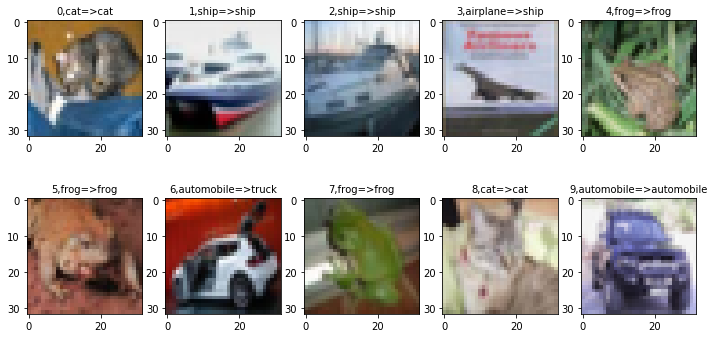

In [3]:

preds=model.predict_classes(x_test)
#定义显示图像数据及其对应标签的函数
#images：图片列表，labels：标签列表，preds:预测值列表，index:从第index个开始显示，num:缺省一次显示5幅

def plot_images_labels_prediction(images,labels,preds,index,num=5):
    fig=plt.gcf()#获取当前图标，Get Current Figure
    fig.set_size_inches(12,6)#1英寸等于2.54cm
    if num>10:
        num=10 #最多显示10个子图
    for i in range(0,num):
        ax=plt.subplot(2,5,i+1)#获取当前要处理的子图
        ax.imshow(images[index])
        title=str(i)+','+label_dict[labels[index][0]]#构建该图上要显示的title信息
        if len(preds)>0:
            title += '=>' + label_dict[preds[index]]
        ax.set_title(title,fontsize=10)#显示图上的title信息
        index += 1
    plt.show()
plot_images_labels_prediction(x_test,y_test,preds,0,10)

In [13]:
# import matplotlib.image as mpimg # mpimg 用于读取图片
# import numpy as np
from PIL import Image
    

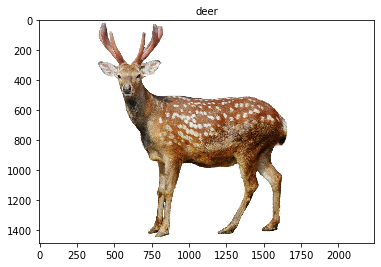

In [37]:
# 预测
lena = Image.open('test8-1.png')         #打开图片
lenaa = lena.resize((32, 32))  
lenaa=np.asarray(lenaa)
lenaa=np.array([lenaa])
preds=model.predict_classes(lenaa)


fig=plt.gcf()#获取当前图标，Get Current Figure
fig.set_size_inches(6,6)#1英寸等于2.54cm
ax=plt.subplot(1,1,1)#获取当前要处理的子图
ax.imshow(lena)
title =  label_dict[preds[0]]
ax.set_title(title,fontsize=10)#显示图上的title信息
plt.show()